In [1]:
# On cree un jeu de donnees factice

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25)

In [2]:
# Separation en entrainement et test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [3]:
# Creation du bagging. Par defaut dans sklearn c'est un arbre decisionnel. 
# On fera ici 5 classifieurs individuels

from sklearn.ensemble import BaggingClassifier 

bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=5)

In [4]:
# Import de fonction d'affichages des differentes zones de classification des arbres

from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

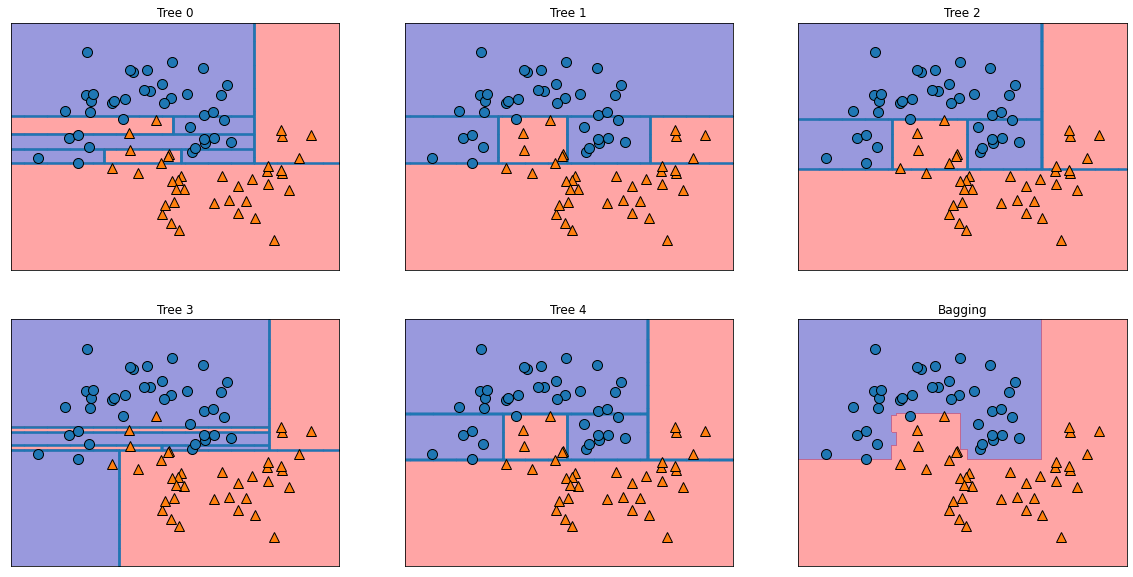

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)